<a href="https://colab.research.google.com/github/HwangHanJae/Dacon_tutorial/blob/main/seoul_bicycle_predict_2021_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 서울의 일별 온도, 습도, 강수량 등 일기 예보 데이터를 통해 따릉이 대여량을 예측해보세요.
* 서울의 2018 ~ 2021년 4년 동안의 날씨 데이터와 2018 ~ 2020년의 따릉이 대여량 데이터가 주어집니다.
* 이 데이터를 이용해 2021년의 따릉이 대여량을 예측해보세요.
* 주어진 데이터 이외의 데이터는 사용 금지입니다!

date_time : 일별 날짜

wind_direction: 풍향 (degree)

sky_condition : 하늘 상태 (하단 설명 참조)

precipitation_form : 강수 형태 (하단 설명 참조)

wind_speed : 풍속 (m/s)

humidity : 습도 (%)

low_temp : 최저 기온 ( `C)

high_temp : 최고 기온 ( `C)

Precipitation_Probability : 강수 확률 (%)

number_of_rentals : 따릉이 대여량

데이터 상세 설명

기상 데이터는 하루에 총 8번 3시간 간격으로 발표되는 기상단기예보(SHRT) 데이터를 1일 평균으로 변환한 데이터입니다.

2019년 6월 4일 까지 sky_condition (하늘 상태) 코드  : 맑음(1), 구름조금(2), 구름많음(3), 흐림(4)

2020년  sky_condition (하늘 상태) 코드  : 맑음(1), 구름많음(3), 흐림(4)

precipitation_form (강수 형태) 코드 : 없음(0), 비(1), 진눈깨비(2), 눈(3), 소나기(4)

원본 데이터에는 없음(0), 비(1),소나기(4)가 포함되어있었으며 진눈깨비(2)와 눈(3) 
성분은 존재하지 않습니다.

리더보드
평가 산식 : NMAE (Normalized Mean Absolute Error) 

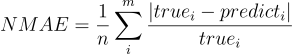

In [ ]:
#평가산식(NMAE)

import numpy as np

def NMAE(y_true, y_pred):
  score = np.mean(np.abs(y_true-y_pred) / y_true)
  return score

In [ ]:
#라이브러리 로드

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import set_matplotlib_formats
plt.style.use("seaborn")
set_matplotlib_formats("svg")

In [ ]:
#데이터 로드

train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/Data/dataset_bicycle_2021/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/Data/dataset_bicycle_2021/test.csv")
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/Data/dataset_bicycle_2021/sample_submission.csv")

train.shape, test.shape, submission.shape

((273, 10), (91, 9), (91, 2))

In [ ]:
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


In [ ]:
#데이터 NULL값 확인

print("train" )
print(train.isnull().sum())
print("-"*25)

print("test")
print(test.isnull().sum())

train
date_time                    0
wind_direction               0
sky_condition                0
precipitation_form           0
wind_speed                   0
humidity                     0
low_temp                     0
high_temp                    0
Precipitation_Probability    0
number_of_rentals            0
dtype: int64
-------------------------
test
date_time                    0
wind_direction               0
sky_condition                0
precipitation_form           0
wind_speed                   0
humidity                     0
low_temp                     0
high_temp                    0
Precipitation_Probability    0
dtype: int64


In [ ]:
#데이터 info 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  273 non-null    object 
 1   wind_direction             273 non-null    float64
 2   sky_condition              273 non-null    float64
 3   precipitation_form         273 non-null    float64
 4   wind_speed                 273 non-null    float64
 5   humidity                   273 non-null    float64
 6   low_temp                   273 non-null    float64
 7   high_temp                  273 non-null    float64
 8   Precipitation_Probability  273 non-null    float64
 9   number_of_rentals          273 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 21.5+ KB


date_time 컬럼은 object타입으로 날짜를 나타냄

##EDA

연속형(독립변수) vs 연속형(종속변수 - number_of_rentals)

산점도, 상관행렬 사용

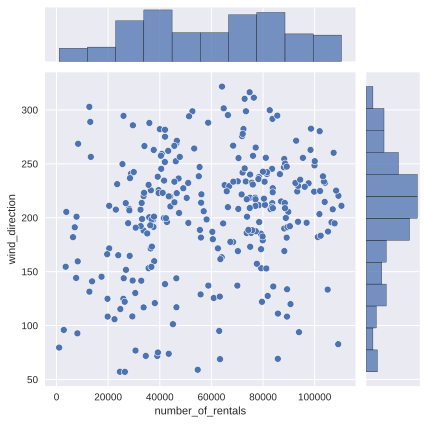

In [ ]:
#wind_direction의 상관관계(산점도)
#sns.scatterplot(data=train, x='number_of_rentals', y="wind_direction",ax=ax)
sns.jointplot(data=train, x='number_of_rentals', y="wind_direction")

wind_direction 컬럼과는 상관이 있어 보이지는 않음

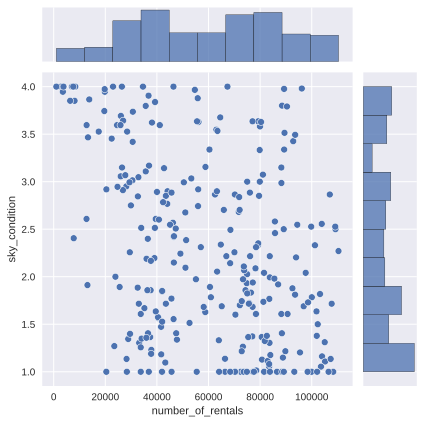

In [ ]:
#sky_condition의 상관관계(산점도)
sns.jointplot(data=train, x='number_of_rentals', y='sky_condition')

wind_direction 컬럼과는 상관이 있어 보이지는 않음

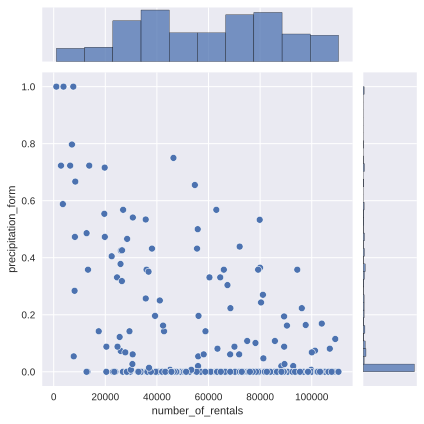

In [ ]:
#precipitation_form의 상관관계(산점도)
sns.jointplot(data=train, x='number_of_rentals', y='precipitation_form')

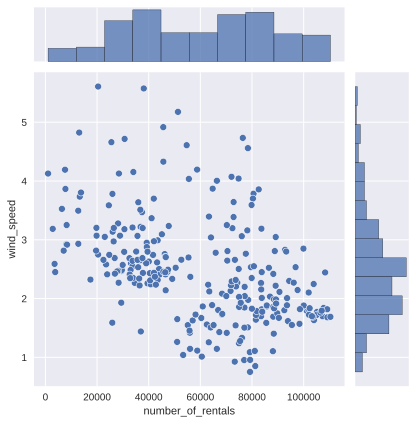

In [ ]:
#wind_speed의 상관관계(산점도)
sns.jointplot(data= train, x='number_of_rentals', y='wind_speed')

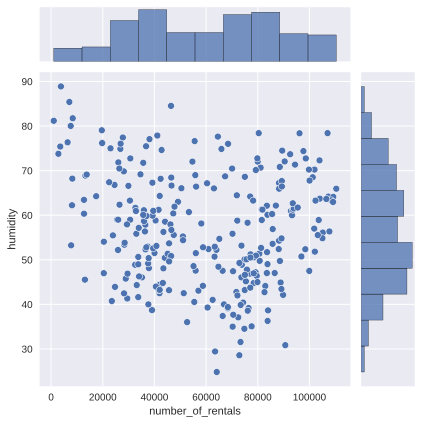

In [ ]:
#humidity의 상관관계(산점도)
sns.jointplot(data=train, x='number_of_rentals', y='humidity')

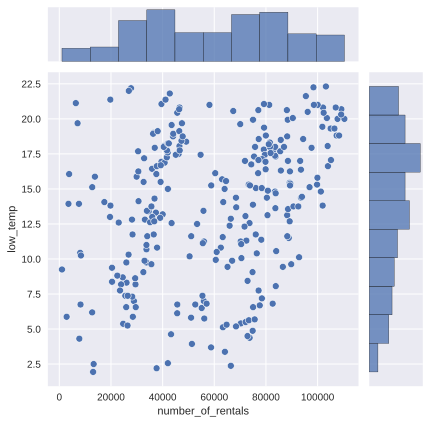

In [ ]:
#low_temp 상관관계(산점도)
sns.jointplot(data=train, x='number_of_rentals', y='low_temp')

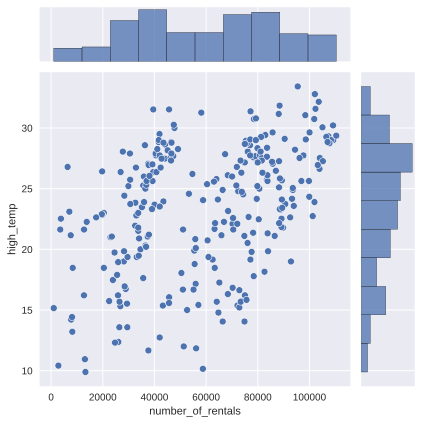

In [ ]:
#high_temp 상관관계(산점도)
sns.jointplot(data=train, x='number_of_rentals', y='high_temp')

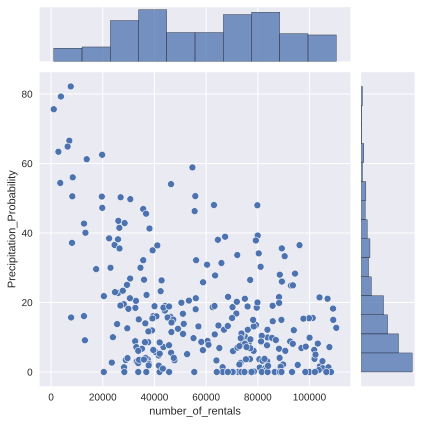

In [ ]:
#Precipitation_Probability 상관관계(산점도)
sns.jointplot(data=train, x='number_of_rentals', y='Precipitation_Probability')

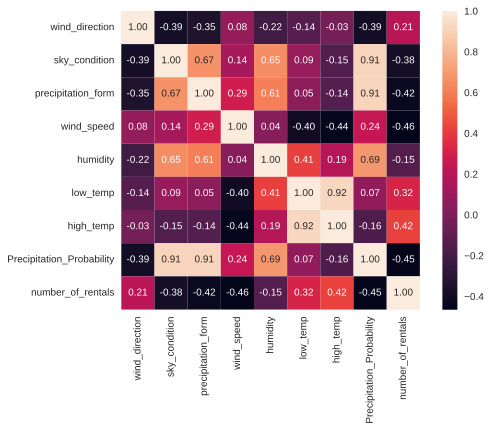

In [ ]:
#상관행렬
sns.heatmap(train.corr(), annot=True, fmt='.2f', square=True)

타겟데이터(따릉이 대여량)와 상관이 많이 높은 데이터는 확인하지 못함

wind_speed, Precipitation_Probability, precipitation_form, high_temp 등이 상대적으로 상관이 있어 보임

아직 시간데이터를 활용하지는 못하였음

#모델링

In [ ]:
#타겟데이터 분리
X = train.drop("number_of_rentals", axis=1)
y = train["number_of_rentals"]

In [ ]:
#불필요한 컬럼 제거(date_time)
drop_col = ["date_time"]
X = X.drop(drop_col, axis=1)
test = test.drop(drop_col, axis=1)

In [ ]:
#홀드아웃
#랜덤포레스트 모델

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3, random_state=42, shuffle=True)

rf.fit(X_train, y_train)
pred = rf.predict(X_val)

NMAE(y_val, pred)

0.6665760944730188

In [ ]:
rf.fit(X, y)
pred = rf.predict(X)

NMAE(y, pred)

0.17831523909040356

In [ ]:
#0.6665760944730188

#제출
y_pred = rf.predict(test)

submission["number_of_rentals"] = y_pred

In [ ]:
submission.to_csv("2021_11_04_submission_basic_rf_0.178.csv", index=False)



대회 측 점수 1.0087로 굉장히 저조, 현재 상위권 0.344

date_time 컬럼 활용과, 변수들의 대한 이해도가 높다면 좋은 점수를 얻을 수 있을 것이라 생각됨.